In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# remove FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [98]:
train = pd.read_csv('data/train.csv')

display(train.head(), train.shape)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


(7905, 20)

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
|---------------|------|------|-------------|-------------|-------|----------------|
| `ID` | ID | Integer | - | unique identifier | - | no |
| `N_Days` | Other | Integer | - | number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 | - | no |
| `Status` | Target | Categorical | - | status of the patient (C censored, CL censored due to liver tx, or D death) | - | no |
| `Drug` | Feature | Categorical | - | type of drug D-penicillamine or placebo | - | yes |
| `Age` | Feature | Integer | Age | age | days | no |
| `Sex` | Feature | Categorical | Sex | M (male) or F (female) | - | no |
| `Ascites` | Feature | Categorical | - | presence of ascites N (No) or Y (Yes) | - | yes |
| `Hepatomegaly` | Feature | Categorical | - | presence of hepatomegaly N (No) or Y (Yes) | - | yes |
| `Spiders` | Feature | Categorical | - | presence of spiders N (No) or Y (Yes) | - | yes |
| `Edema` | Feature | Categorical | - | presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy) | - | no |
| `Bilirubin` | Feature | Continuous | - | serum bilirubin | mg/dl | no |
| `Cholesterol` | Feature | Integer | - | serum cholesterol | mg/dl | yes |
| `Albumin` | Feature | Continuous | - | albumin | gm/dl | no |
| `Copper` | Feature | Integer | - | urine copper | ug/day | yes |
| `Alk_Phos` | Feature | Continuous | - | alkaline phosphatase | U/liter | yes |
| `SGOT` | Feature | Continuous | - | SGOT | U/ml | yes |
| `Triglycerides` | Feature | Integer | - | triglycerides | - | yes |
| `Platelets` | Feature | Integer | - | platelets per cubic | ml/1000 | yes |
| `Prothrombin` | Feature | Continuous | - | prothrombin time | s | yes |
| `Stage` | Feature | Categorical | - | histologic stage of disease (1, 2, 3, or 4) | - | yes |


In [99]:
# import dtale
# dtale.show(train, open_browser=True)

In [100]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [102]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [103]:
# check duplicate
train.duplicated().sum()

0

<Axes: >

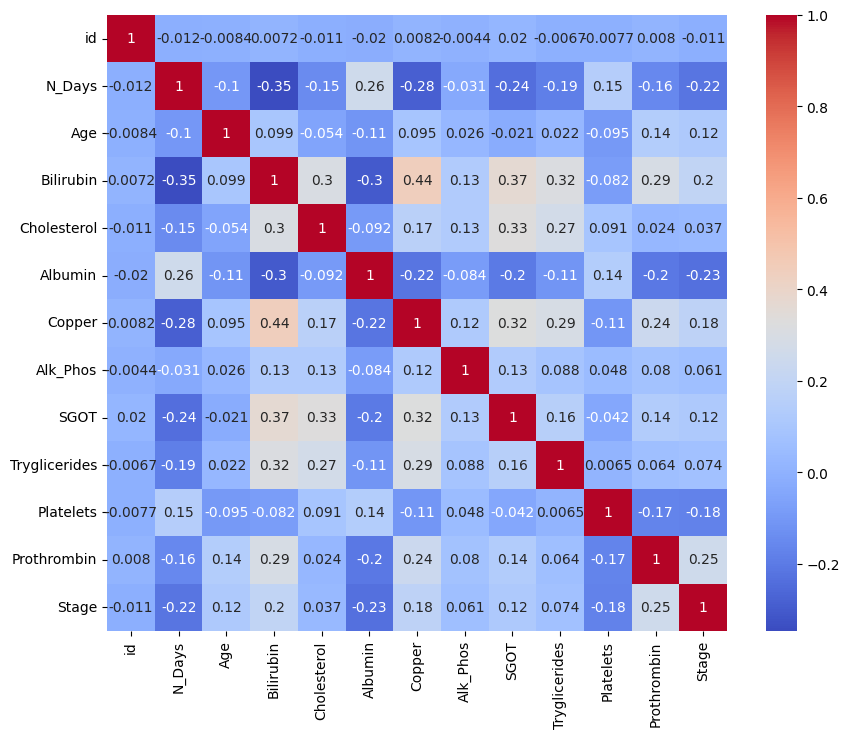

In [104]:
# print heatmap for all the numerical columns
plt.figure(figsize=(10, 8))
num_cols = train.select_dtypes(include=np.number).columns
sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm')

In [105]:
def clean_data(df):
    for column in df.columns:
        # Check if the column has exactly two unique values
        if len(df[column].unique()) == 2:
            df[column] = df[column].astype('category').cat.codes
            df[column] = df[column].astype('int64')
        # Convert object type columns to category
        elif df[column].dtype == 'object':
            df[column] = df[column].astype('category')

    return df

In [106]:
df_train = clean_data(train)
df_train['Stage'] = df_train['Stage'].astype('int').astype('category')

In [107]:
display(df_train.head(), df_train.dtypes)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3,D
1,1,2574,1,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3,C
2,2,3428,1,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4,D
3,3,2576,1,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3,C
4,4,788,1,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4,C


id                  int64
N_Days              int64
Drug                int64
Age                 int64
Sex                 int64
Ascites             int64
Hepatomegaly        int64
Spiders             int64
Edema            category
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage            category
Status           category
dtype: object

In [95]:
test = pd.read_csv('data/test.csv')
df_test = clean_data(test)
df_test['Stage'] = df_test['Stage'].astype('int').astype('category')

In [96]:
# save cleaned data
df_train.to_csv('data/train_cleaned.csv', index=False)
df_test.to_csv('data/test_cleaned.csv', index=False)